# Etape 1: EXPLORATION + NETTOYAGE

In [98]:
import pandas as pd

df= pd.read_csv('loan_approval_dataset.csv')
df.head()

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,1,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,2,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,3,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,4,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,5,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0


### Dans ce dataset on observe l'absence d'une variable importante , à partir des informations du dataset plus précisement Credit_Score et Previous_Defaults on va créer la colonne loan_status qui va déterminer si le client peut obtenir un pret ou  non

In [99]:
# Création de la colonne 'Loan_Status'
df['Loan_Status'] = df.apply(
    lambda row: 1 if (row['Credit_Score'] > 700 and row['Previous_Defaults'] == 0) else 0,
    axis=1
)

# Vérification
print(df['Loan_Status'].value_counts())

Loan_Status
0    3760
1    1240
Name: count, dtype: int64


In [100]:
df.head()

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults,Loan_Status
0,1,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0,0
1,2,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0,0
2,3,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0,0
3,4,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0,1
4,5,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Credit_Score          5000 non-null   int64  
 4   Loan_Amount           5000 non-null   int64  
 5   Loan_Term             5000 non-null   int64  
 6   Interest_Rate         5000 non-null   float64
 7   Employment_Status     5000 non-null   object 
 8   Debt_to_Income_Ratio  5000 non-null   float64
 9   Marital_Status        5000 non-null   object 
 10  Number_of_Dependents  5000 non-null   int64  
 11  Property_Ownership    5000 non-null   object 
 12  Loan_Purpose          5000 non-null   object 
 13  Previous_Defaults     5000 non-null   int64  
 14  Loan_Status           5000 non-null   int64  
dtypes: float64(2), int64(

In [102]:
df.describe()

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Number_of_Dependents,Previous_Defaults,Loan_Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.584600,110220.247000,574.183200,252118.47900,41.769600,8.873018,27.177244,2.010200,0.099400,0.248000
std,1443.520003,14.919094,52075.384023,160.437715,142580.00452,20.598868,3.622642,12.888572,1.398459,0.299228,0.431895
min,1.000000,18.000000,20028.000000,300.000000,5050.00000,12.000000,2.500000,5.000000,0.000000,0.000000,0.000000
25%,1250.750000,31.000000,64751.000000,434.750000,129940.25000,24.000000,5.790000,16.030000,1.000000,0.000000,0.000000
50%,2500.500000,43.000000,110180.500000,573.000000,250846.50000,36.000000,8.900000,27.220000,2.000000,0.000000,0.000000
75%,3750.250000,56.000000,155749.750000,715.000000,378021.75000,60.000000,11.970000,38.235000,3.000000,0.000000,0.000000
max,5000.000000,69.000000,199992.000000,849.000000,499651.00000,72.000000,15.000000,49.990000,4.000000,1.000000,1.000000


In [103]:
df.duplicated().sum()

np.int64(0)

In [104]:
df.isna().sum()

Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
Loan_Status             0
dtype: int64

In [105]:
df.drop('Applicant_ID', axis=1, inplace=True)

In [106]:
# Encodage des valeurs catégorielles en numériques (encodage)
from sklearn.preprocessing import LabelEncoder

encoding_mappings = {}

for col in df.columns:
  if df[col].dtype == 'object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoding_mappings = dict(zip(le.classes_, le.transform(le.classes_)))
    print(col)

Employment_Status
Marital_Status
Property_Ownership
Loan_Purpose


# Etape 2: VISUALISATION


## informations importantes:

#### Le score de crédit est une note (en général entre 300 et 850) qui indique à quel point un client est "fiable" pour rembourser un prêt.

#### ➔ Plus le score est élevé, plus les banques considèrent le client comme un bon emprunteur.
#### ➔ Plus le score est bas, plus la banque pense que le client risque de ne pas rembourser

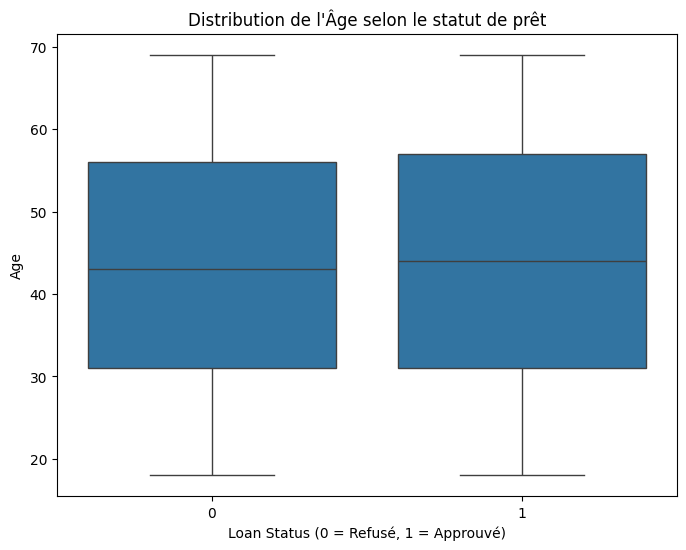

In [107]:
 #l'âge en fonction de l'approbation de prêt
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Loan_Status', y='Age', data=df)
plt.title("Distribution de l'Âge selon le statut de prêt")
plt.xlabel("Loan Status (0 = Refusé, 1 = Approuvé)")
plt.ylabel("Age")
plt.show()



## Observations faites
### La médiane de l'âge est presque la même pour les deux groupes (environ 42-43 ans).

### L'étendue (min-max) est aussi similaire (entre 20 ans et 70 ans).

### Pas de différence marquée sur l'âge entre ceux qui obtiennent leur prêt approuvé (Loan Status = 1) et ceux à qui on refuse (Loan Status = 0).

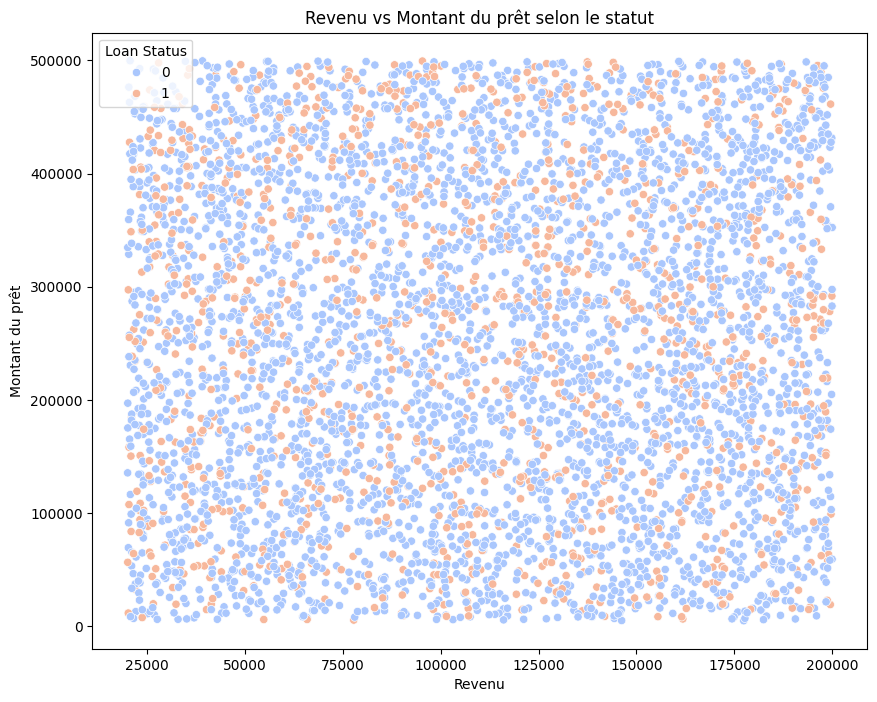

In [108]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income', y='Loan_Amount', hue='Loan_Status', data=df, palette='coolwarm')
plt.title('Revenu vs Montant du prêt selon le statut')
plt.xlabel('Revenu')
plt.ylabel('Montant du prêt')
plt.legend(title='Loan Status')
plt.show()



## Observation faites:

### Chaque point représente un client (avec son revenu annuel en abscisse et son montant de crédit en ordonnée).

###  Les points sont très dispersés — il n'y a pas de vraie relation linéaire évidente entre le revenu et le montant du crédit.
### ➔ Cela veut dire que le revenu annuel seul n'explique pas directement le montant du crédit demandé.

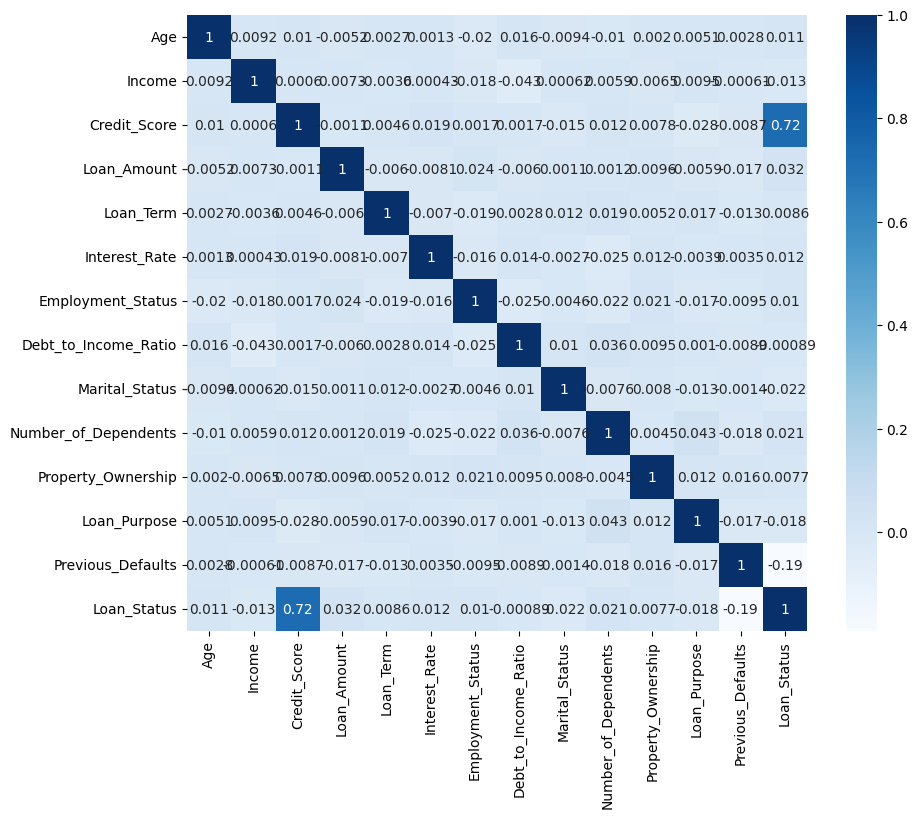

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()



## Observations faites

### Credit_Score et Loan_Status :

### Corrélation forte positive autour de 0.72.
### ➔ Cela confirme que plus le score de crédit est élevé, plus les prêts sont approuvés.

# Etape 3: Préparation Machine Learning


### 1.Standardisation / Normalisation des données

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standar = df[["Income", "Loan_Amount","Credit_Score"]]
scaler = MinMaxScaler()
scaler.fit(standar)
scaled_data = scaler.transform(standar)
print("Valeurs originales :\n", standar)
print("\nValeurs maximales après fit :\n", scaler.data_max_)
print("\nValeurs minimales après fit :\n", scaler.data_min_)
print("\nDonnées mises à l'échelle :\n", scaled_data)

Valeurs originales :
       Income  Loan_Amount  Credit_Score
0      21920       452748           639
1     126121       257134           655
2      96872       226437           467
3     101132       310480           751
4      22093        13070           404
...      ...          ...           ...
4995  169594       299944           755
4996  162728        15886           829
4997  166965       477830           468
4998   36493       205981           442
4999  154704       183308           336

[5000 rows x 3 columns]

Valeurs maximales après fit :
 [199992. 499651.    849.]

Valeurs minimales après fit :
 [20028.  5050.   300.]

Données mises à l'échelle :
 [[0.01051321 0.90517003 0.61748634]
 [0.58952346 0.50967143 0.64663024]
 [0.42699651 0.44760726 0.30418944]
 ...
 [0.81647996 0.95588161 0.30601093]
 [0.09149052 0.40624867 0.25865209]
 [0.74834967 0.36040768 0.06557377]]


### 2. Séparation des variables 

In [111]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)

y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille du train : {X_train.shape}")
print(f"Taille du test : {X_test.shape}")

Taille du train : (4000, 13)
Taille du test : (1000, 13)


### 3.Création et entraînement le modèle

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000, random_state=42)

### 4.Prédiction sur x_test

In [113]:
y_pred = model.predict(X_test)

### 5.Evaluation des performances

In [114]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")


print("\nClassification Report :")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(conf_matrix)


Accuracy : 0.81

Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.91      0.87       729
           1       0.68      0.55      0.61       271

    accuracy                           0.81      1000
   macro avg       0.77      0.73      0.74      1000
weighted avg       0.80      0.81      0.80      1000


Matrice de confusion :
[[660  69]
 [121 150]]


### 6.Visualisation de la matrice de confusion

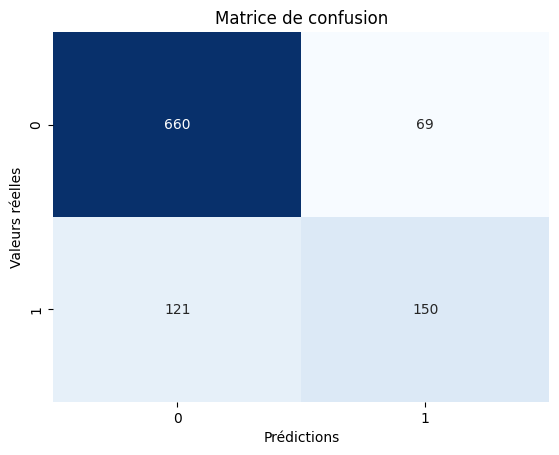

In [115]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

## Conclusion

642 clients bien classés comme "solvables".

172 clients bien classés comme "à risque".

87 erreurs en classant à tort des non-défauts.

99 erreurs en ratant des défauts.

In [116]:
import joblib
joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']